In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# i0 = 1.2 * (10**-3)
i0 = 2.55
alpha = 2
F = 96485
R = 8.314
T = 298


#Ciref = 10**-3
CO = 0.26 #mol/m3
CR = (10**-4)

# Eeq = 0.203 - ((R*T)/(n*F))*np.log(CR/CO)
Eeq = 0.203 
# Ect = np.array([-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
Ect = -1.1
OV = -0.075
# OV = Ect-Eeq

step = 10 #2 minutes
time_step = np.arange(0,60.001*60,step)

concO2 = np.array([0.26])
concOH = np.array([10**-4])

current = np.array([0])
O2_limit = 10**-20


In [3]:
for i,t in enumerate(time_step):
    if i == len(time_step) - 1:
        break
    
    # Make this a function
    iloc = i0*((concOH[i]*np.exp((alpha*F*OV)/(R*T))) - (concO2[i]*np.exp((-(alpha)*F*OV)/(R*T))))
    RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption
    ROH = 4*abs(iloc)/(F*4) #Rate of OH production
    newCurrent = iloc*0.0104
    current = np.append(current, newCurrent)
    #Concentration of oxygen
    new_concO2 = (RO2*step) + concO2[i] #Nerst equation to calculate new concentration
    if new_concO2 <= O2_limit:
        concO2 = np.append(concO2, min(concO2))
        
        #Calculate the New conc of OH based on O2_limit
        concOH = np.append(concOH, max(concOH))
    else:
        concO2 = np.append(concO2, new_concO2)
        #Concentration of hydroxide
        new_concOH = (ROH*step) + concOH[i]
        concOH = np.append(concOH, new_concOH)
    

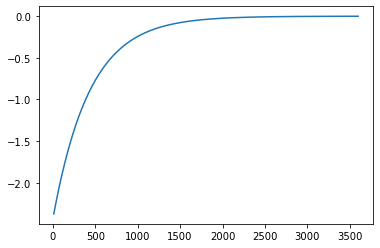

In [4]:
plt.plot(time_step[1:],current[1:])

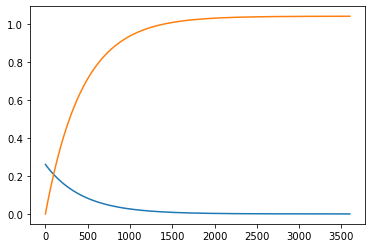

In [5]:
plt.plot(time_step,concO2,time_step,concOH)

In [ ]:
DO2= 2.9e-9 #m2/s
step_x = 10 #2 minutes
x_step = np.arange(0,60.001*60,step_x)
for i,t in enumerate(time_step):
    for j,x in enumerate(x_step):
        cO2[i,j]= R(x_step)**2/DO2 + cO2[i,j-1]
        
        
    